# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для определения зависимости между категориальными переменными будем смотреть на долю невернувших кредит в срок по каждой из групп. Также, для адекватной оценки доли в каждой группе стоит видеть информацию о количестве людей в каждой группе и количестве "должников" по каждой группе.

Для расчета доли по разным видам категорий будет удобно использовать функцию, которая получает на вход исходный ДатаФрейм data, название столбца, по которому будет производиться группировка, и название столбца, по которому будет расчитываться доля должников. Функция будет возвращать таблицу с расчетными значениями по каждой категории.

In [22]:
def depend_function(df, group_col, value_col):   # объявляем функцию 
    try:
        group_by_col = df.groupby(group_col)[value_col]    # группируем по категориальной переменной расчетную переменную
    
        count_value = group_by_col.apply(lambda x: x.count())   # считаем общее количество людей в каждой группе
    
        sum_value = group_by_col.apply(lambda x: x.sum())   # считаем количество должников
    
        proportion_value = sum_value / count_value   # находим долю должников в каждой группе
    
    
        result_data = pd.concat([proportion_value, count_value, sum_value], axis=1)   # объеденим в один датафрейм расчетные объекты
        result_data.columns = ['proportion_value', 'count_value', 'sum_value']   # укажем названия столбцов
    
        return result_data                                                       # возвращаем полученную таблицу
    
    except:
        return 'Что-то пошло не так! Проверь функцию!'

          proportion_value  count_value  sum_value
children                                          
0                 0.075438        14091       1063
1                 0.092346         4808        444
2                 0.094542         2052        194
3                 0.081818          330         27
4                 0.097561           41          4
5                 0.000000            9          0


<AxesSubplot:ylabel='proportion_value'>

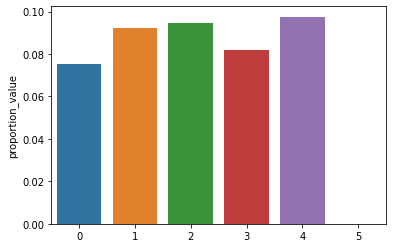

In [23]:
result_children = depend_function(data, 'children', 'debt')   # вызываем функцию для расчета

print(result_children)                                        # выводем полученную таблицу

sns.barplot(x=sorted(data['children'].unique()) , y='proportion_value', data=result_children)    # посторим график доли "должников" для наглядности

Наблюдается общий тренд на увеличение процента "должников", в зависимости от увеличения количества детей. Если в случае когорты с пятью детьми очевидно, что данных о таких клиентах мало, то группу с тремя детьми можно рассмотреть несколько подробнее.

Выделим группу людей с тремя детьми и посмотрим на процент "должников" в зависимости от цели кредита.

In [24]:
three_children = data.pivot_table(index=['children','purpose_category'], \
                                  columns='debt',  values='total_income', aggfunc='count')  # создаем сводную таблицу
three_children['proportion'] = three_children[1] / (three_children[1] + three_children[0])  # считаем долю должников

filtered = three_children.loc[[3]].sort_values('proportion')    # оставляем только группу с тремя детьми
                                                                # и сортируем по доле должников
filtered


debt                                   0     1  proportion
children purpose_category                                 
3        получение образования      65.0   4.0    0.057971
         операции с недвижимостью  156.0  13.0    0.076923
         операции с автомобилем     55.0   5.0    0.083333
         проведение свадьбы         27.0   5.0    0.156250

**Вывод:** определенно существует зависимость между количеством детей и возвратом кредита в срок. Общая тенденция показывает, что, чем больше детей, тем меньше вероятность возврата кредита в срок. Это можно объяснить высокой финансовой нагрузкой на клиента. 

Группа людей с пятью детьми слишком мала в данной выборке, чтобы можно было сделать о ней какие-либо выводы.

В свою очередь когорта людей с тремя детьми несколько нарушает общий тренд. Возможно это связано с большим материнским капиталом, который выплачивают за третьего ребенка, причем, как известно, тратить его можно на улучшение условий жилья или, например образование. 
Для заемщиков с тремя детьми процент "должников" самый низкий именно в этих целях кредитования. Однако, на данном этапе это предположение. Для его подтверждения или опровержения необходимо больше данных о выплатах материнского капитала и его использования.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

                       proportion_value  count_value  sum_value
family_status                                                  
Не женат / не замужем          0.097639         2796        273
в разводе                      0.070648         1189         84
вдовец / вдова                 0.066246          951         63
гражданский брак               0.093130         4134        385
женат / замужем                0.075606        12261        927


<AxesSubplot:xlabel='proportion_value'>

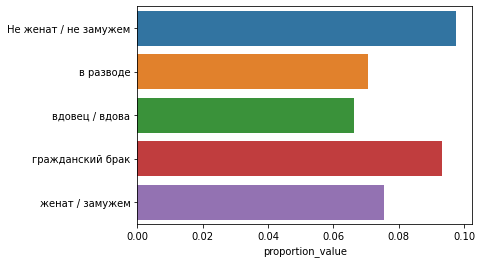

In [25]:
result_family_status = depend_function(data, 'family_status', 'debt')

print(result_family_status)

sns.barplot(x='proportion_value', y=sorted(data['family_status'].unique()), data=result_family_status)

Самый высокий процент "должников" наблюдается в когорте "не женат / не замужем", также высокий процент у группы "гражданский брак". Посчитаем медианное значение возраста для каждой группы

In [26]:
print(data.groupby('family_status')['dob_years'].median().sort_values())

family_status
Не женат / не замужем    36
гражданский брак         41
женат / замужем          43
в разводе                46
вдовец / вдова           58
Name: dob_years, dtype: int64


**Вывод:** зависимость между семейным положением и возвратом кредита в срок есть. Когорты "не женат / не замужем" и "гражданский брак" имеют самый высокий процент должников. В то же время эти группы имеют "самую молодую" медиану возраста. Семейные пары и люди более взрослые могут иметь более высокую финансовую стабильность.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

                       proportion_value  count_value  sum_value
total_income_category                                          
A                              0.080000           25          2
B                              0.070602         5014        354
C                              0.084982        15921       1353
D                              0.060172          349         21
E                              0.090909           22          2


<AxesSubplot:xlabel='proportion_value'>

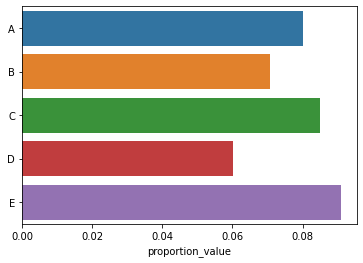

In [27]:
result_total_income = depend_function(data, 'total_income_category', 'debt')

print(result_total_income)

sns.barplot(x='proportion_value', y=sorted(data['total_income_category'].unique()), data=result_total_income)

**Вывод:** клиенты с уровнем дохода D имеют наименьший процент "должников" (6%). Клиенты с уровнем дохода Е имеют наибольший процент "должников" (8%), однако они представленны всего 22 клиентами, что слишком мало, чтобы сделать значимые выводы. 
То же самое касается и группы людей с уровнем дохода А, которые представлены 25 клиентами.

Клиенты с более высоким уровнем дохода имеют тенденцию иметь более низкий процент "должников", в то время как клиенты с более низким уровнем дохода имеют более высокий процент "должников".

Однако стоит отметить, что это не является абсолютной закономерностью и что существуют исключения из этого правила.


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

                          proportion_value  count_value  sum_value
purpose_category                                                  
операции с автомобилем            0.093480         4279        400
операции с недвижимостью          0.072551        10751        780
получение образования             0.092528         3988        369
проведение свадьбы                0.079118         2313        183


<AxesSubplot:xlabel='proportion_value'>

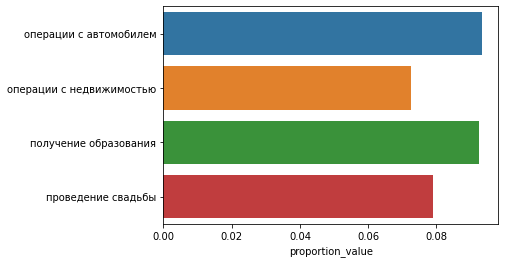

In [28]:
result_purpose = depend_function(data, 'purpose_category', 'debt')

print(result_purpose)

sns.barplot(x='proportion_value', y=sorted(data['purpose_category'].unique()), data=result_purpose)

**Вывод:** Наименьший процент "должников" по кредитам у категории "операции с недвижимостью" - 7.25%, что говорит о том, что этот вид кредитования наиболее надежный.

Наибольший процент должников по кредитам у категории "операции с автомобилем" - 9.35%, что говорит о том, что кредиты на покупку автомобиля могут быть рискованным видом финансирования.

Процент должников по кредитам на образование (9.25%) и проведение свадьбы (7.91%) находятся на промежуточном уровне.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
1. Человеческий фактор - ошибка при заполнении данных.
2. Технические проблемы сбора данных при их трансформации, выгрузке, перевода данных из одного формата в другой
3. Системные ошибки, связанные с нарушением работы программного обеспечения или оборудования, которые могут привести к потере или искажению данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* медианное значение позволяет сохранить среднее значение набора данных не искажая распределения данных. Также медианное значение помогает избежать влияния выбросов в данных.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.
В ходе исследования надежности заемщиков были проанализированы данные о клиентах банка, которые брали кредиты. Были рассмотрены различные аспекты, такие как уровень дохода, цель кредита, наличие детей и т.д., и их влияние на возврат кредита в срок.

В ходе анализа было выявлено, что наличие детей, семейное положение, уровень дохода оказывают влияние на возврат кредита в срок. Определили, что кредиты, взятые на операции с недвижимостью, чаще возвращаются в срок, в то время как кредиты, взятые на операции с автомобилем, чаще не возвращаются в срок.

Кроме того, были обнаружены пропуски в данных, которые были заполнены медианными значениями, так как это лучшее решение для количественных переменных.

Общий вывод исследования заключается в том, что на возврат кредита в срок оказывают влияние различные факторы, и эти факторы необходимо учитывать при выдаче кредита. Кроме того, необходимо более тщательно проверять кредитную историю заемщика, чтобы уменьшить риски невозврата кредита.